In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import scipy

In [58]:
data, sr = librosa.load('center1_lower.wav', sr =  None, mono = True)
print(sr)

IPython.display.Audio(data=data, rate=sr)

44100


(0.0, 2000.0)

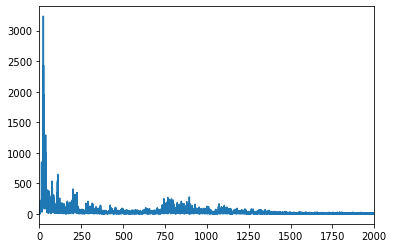

In [24]:
n = len(data)
freq = abs(scipy.fft.fft(data)[:n//2])
xf = np.linspace(0., sr / 2, n // 2)

plt.plot(xf, freq)
plt.xlim((0, 2000))

In [59]:
cutoff = 1000

b, a = scipy.signal.butter(6, cutoff, btype='low', fs=sr)
filtered = scipy.signal.lfilter(b, a, data)

print(f'low pass filter at {cutoff}Hz')
IPython.display.Audio(data=filtered, rate=sr)

low pass filter at 1000Hz


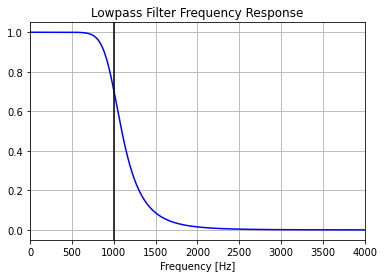

In [51]:
w, h = scipy.signal.freqz(b, a, fs=sr, worN=8000)

plt.plot(w, np.abs(h), 'b')
plt.axvline(cutoff, color='k')
plt.xlim(0, cutoff * 4)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()